In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import chardet
import seaborn as sns
from matplotlib import pyplot as plt

### Read the dataset

In [3]:
file_path = r"D:\Smart Farming.xlsx"

In [4]:
df = pd.read_excel(file_path)

### Exploratory Data Analysis

In [6]:
df.head()

,N,P,K,EC,PH,Temp,Moisture,ID,Date
0,10,20,32,98,5.0,32,44,ICESCO2,"September 15, 2024 12:13:02 PM"
1,10,26,29,102,6.0,25,47,ICESCO1,"September 09, 2024 07:34:09 PM"
2,13,18,28,17,5.0,27,26,ICESCO1,"September 21, 2024 10:33:53 AM"
3,13,18,27,28,7.2,25,28,ICESCO1,"September 21, 2024 10:42:27 AM"
4,13,17,28,25,4.2,27,33,ICESCO1,"September 21, 2024 10:44:17 AM"


In [7]:
df.tail()

,N,P,K,EC,PH,Temp,Moisture,ID,Date
147,16,18,27,63,7.0,27,28,ICESCO1,"September 21, 2024 12:22:34 PM"
148,16,19,27,15,6.7,26,24,ICESCO1,"September 21, 2024 12:23:18 PM"
149,18,28,31,98,5.0,24,49,ICESCO1,"September 09, 2024 06:35:33 PM"
150,21,20,18,66,6.0,27,43,ICESCO1,"September 09, 2024 07:39:54 PM"
151,23,12,30,78,6.0,24,45,ICESCO1,"September 09, 2024 07:31:10 PM"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   N         152 non-null    int64  
 1   P         152 non-null    int64  
 2   K         152 non-null    int64  
 3   EC        152 non-null    int64  
 4   PH        152 non-null    float64
 5   Temp      152 non-null    int64  
 6   Moisture  152 non-null    int64  
 7   ID        152 non-null    object 
 8   Date      152 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 10.8+ KB


In [9]:
# Check for missing numbers
df.isnull().sum()

N           0
P           0
K           0
EC          0
PH          0
Temp        0
Moisture    0
ID          0
Date        0
dtype: int64

In [42]:
# Check the number of observations
print("Number of Observations: ", len(df))

Number of Observations:  152


### Exploration with Visualization

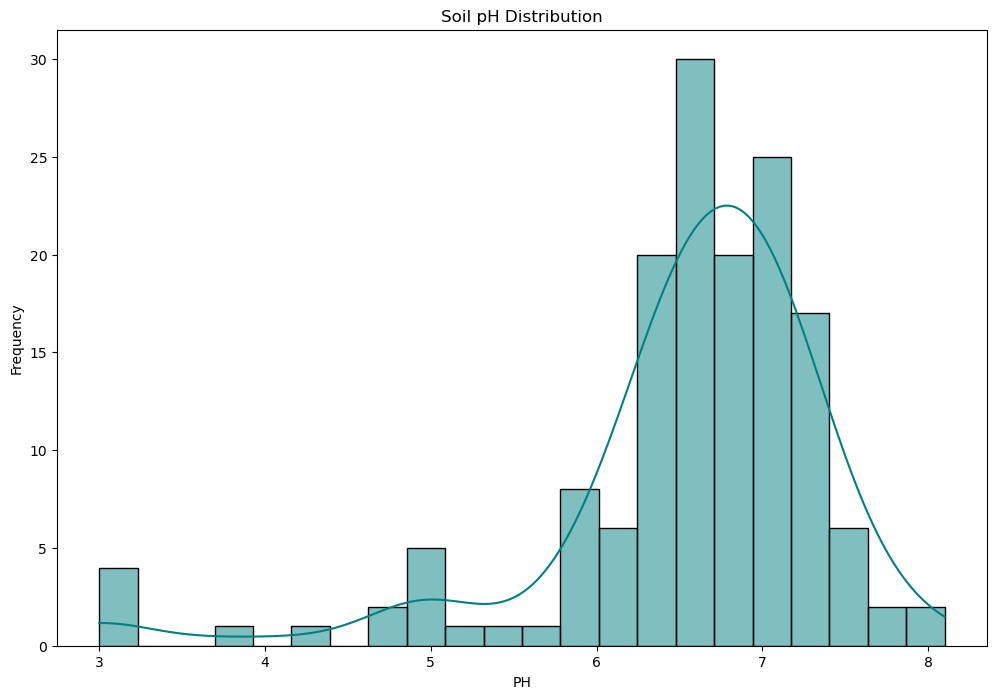

In [10]:
# visualize the data
plt.figure(figsize=(12, 8))
sns.histplot(df['PH'], kde=True, color='teal')
plt.title('Soil pH Distribution')
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.savefig('PHDistri.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

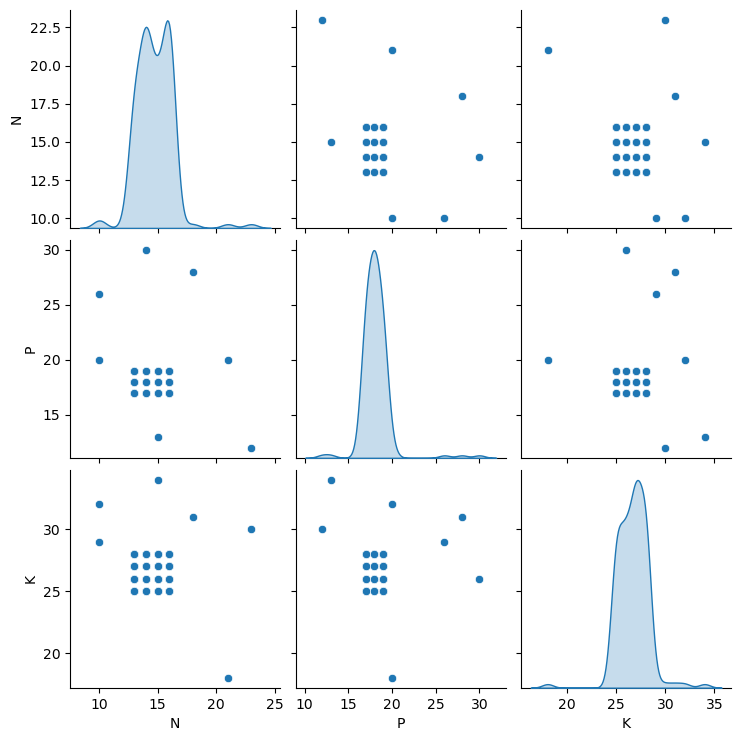

In [11]:
# Pairplot to visualize relationships between the soil nutrient parameters
sns.pairplot(df, vars=['N', 'P', 'K'], diag_kind='kde')
plt.savefig('relationshipPlotNPK.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

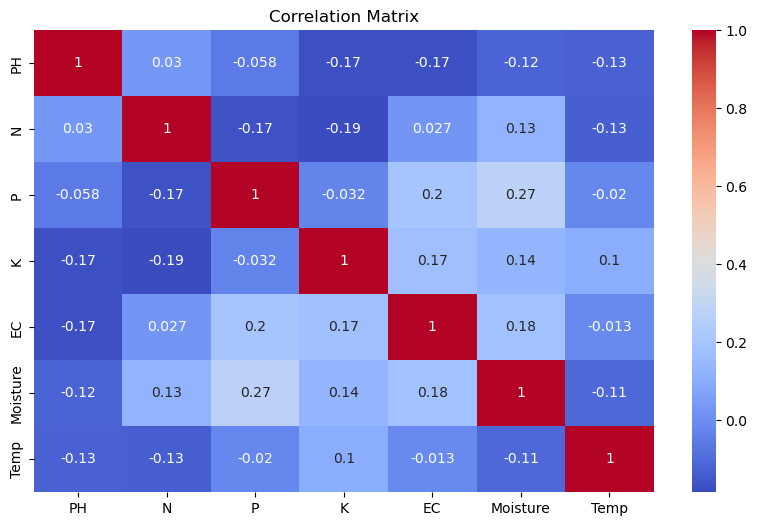

In [12]:
# Visualize correlation matrix to find relationships between features
plt.figure(figsize=(10, 6))
correlation_matrix = df[['PH', 'N', 'P', 'K', 'EC', 'Moisture', 'Temp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("corr.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

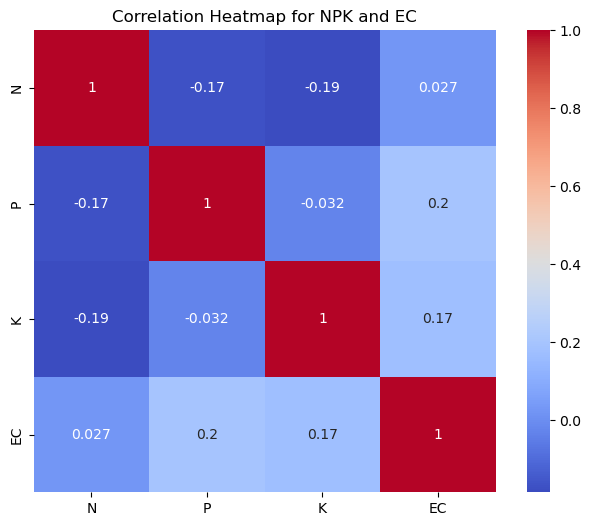

In [13]:
# Calculate correlation matrix for NPK and EC
corr_matrix = df[['N', 'P', 'K', 'EC']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for NPK and EC')
plt.savefig('corrMatrixNPKEC.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

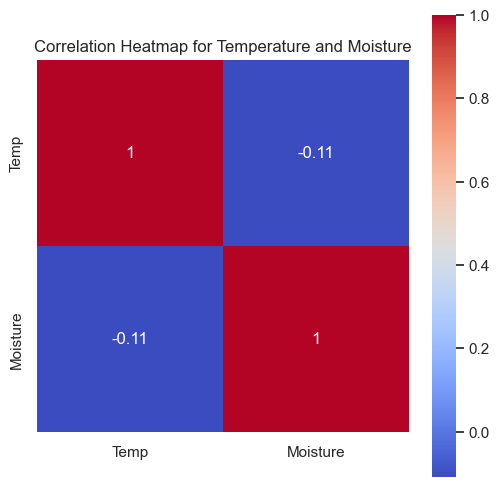

In [36]:
# Calculate correlation matrix between temperature and Moisture
corr_matrix = df[['Temp', 'Moisture']].corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Temperature and Moisture')
plt.savefig('corrMatrixTempMoisture.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

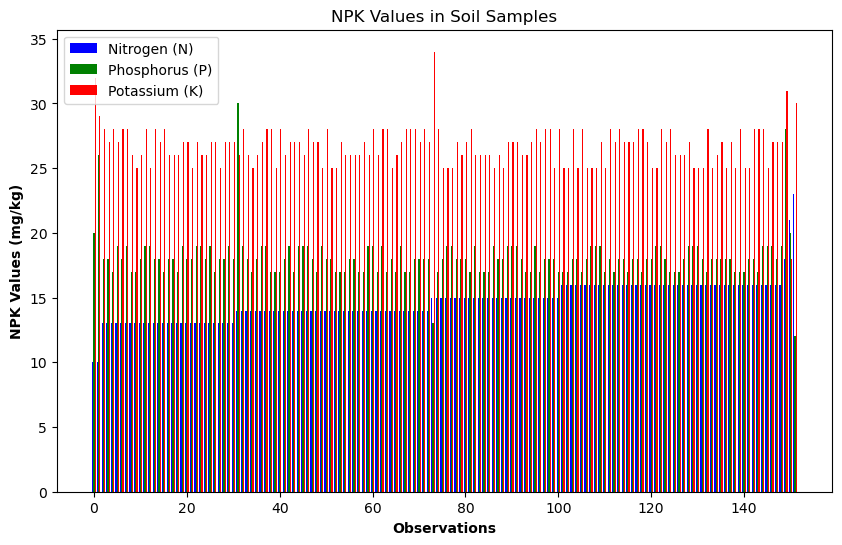

In [14]:
# Calculate positions for grouped bars
bar_width = 0.25
x = np.arange(len(df))  # Positions for each group of bars

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, df['N'], width=bar_width, color='b', label='Nitrogen (N)')
plt.bar(x, df['P'], width=bar_width, color='g', label='Phosphorus (P)')
plt.bar(x + bar_width, df['K'], width=bar_width, color='r', label='Potassium (K)')

# Labels and title
plt.xlabel('Observations', fontweight='bold')
plt.ylabel('NPK Values (mg/kg)', fontweight='bold')
plt.title('NPK Values in Soil Samples')

# Remove x-tick labels
# plt.xticks([])

# Legend
plt.legend()

# Save the image
plt.savefig('groupPlot.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

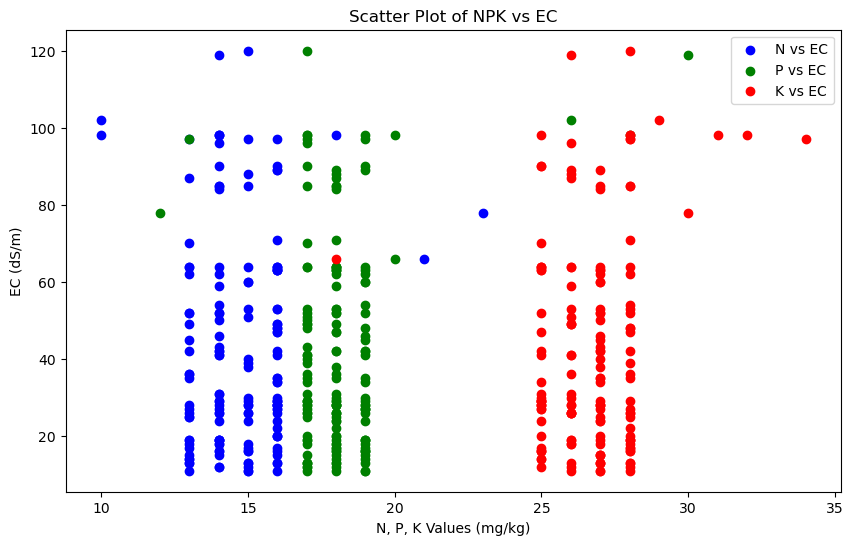

In [15]:
# Scatter plot for NPK vs EC
plt.figure(figsize=(10, 6))
plt.scatter(df['N'], df['EC'], color='blue', label='N vs EC')
plt.scatter(df['P'], df['EC'], color='green', label='P vs EC')
plt.scatter(df['K'], df['EC'], color='red', label='K vs EC')
plt.xlabel('N, P, K Values (mg/kg)')
plt.ylabel('EC (dS/m)')
plt.title('Scatter Plot of NPK vs EC')
plt.legend()
plt.savefig('scatterPlotNPKEC.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

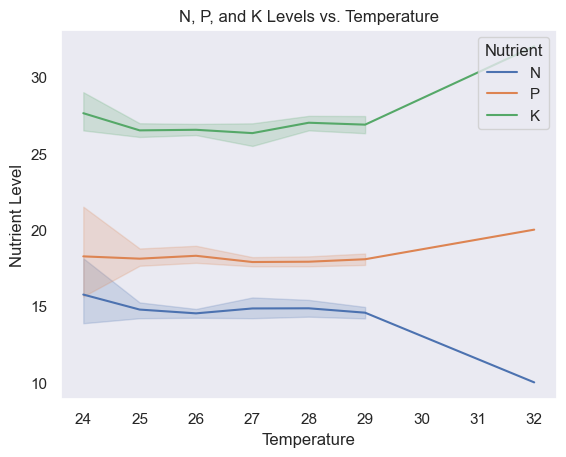

In [16]:
# Reshape the DataFrame from wide to long format
df_melted = df.melt(id_vars="Temp", value_vars=["N", "P", "K"], 
                    var_name="Nutrient", value_name="Value")

# Plot using Line Plot
sns.set(style="dark")
sns.lineplot(x="Temp", y="Value", hue="Nutrient", data=df_melted)
plt.xlabel("Temperature")
plt.ylabel("Nutrient Level")
plt.title("N, P, and K Levels vs. Temperature")
plt.savefig('lnePlotNPKT.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

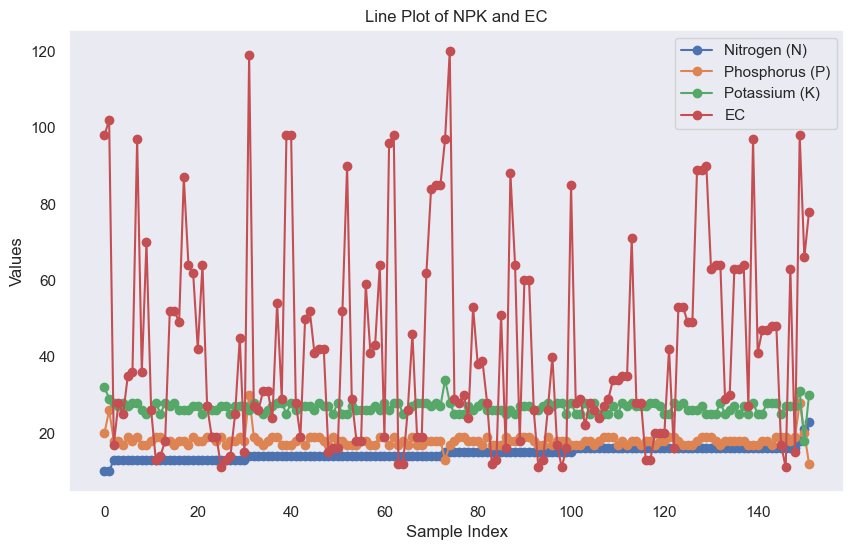

In [17]:
# Line plot for NPK and EC
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['N'], marker='o', label='Nitrogen (N)')
plt.plot(df.index, df['P'], marker='o', label='Phosphorus (P)')
plt.plot(df.index, df['K'], marker='o', label='Potassium (K)')
plt.plot(df.index, df['EC'], marker='o', label='EC')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Line Plot of NPK and EC')
plt.legend()
plt.savefig('linePlot.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Time and Other Variables Explorations

### Model Clustering
Using the K-Means Clustering Algorithm to cluster the data.

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Finding the optimal number of clusters using the elbow method

In [35]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['PH', 'N', 'P', 'K', 'EC', 'Moisture', 'Temp']])

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

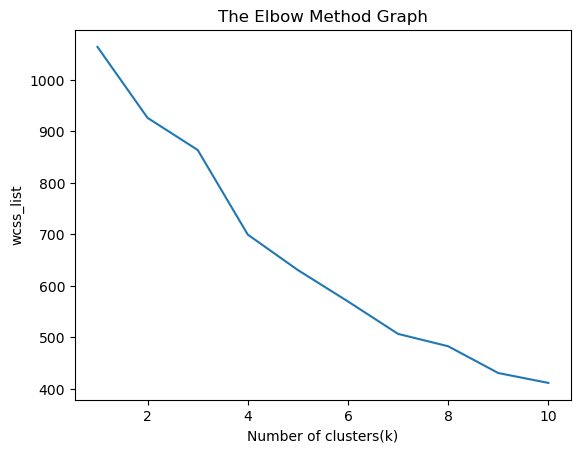

In [48]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(scaled_data)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.savefig('wcssNClusters.png', format='png', dpi=300, bbox_inches='tight')
plt.show()  

### Standardize the data using Standard Scaler

In [52]:
# Apply K-Means clustering to identify similar groups of soil types
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(scaled_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
# Using PCA for 2D visualization of clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

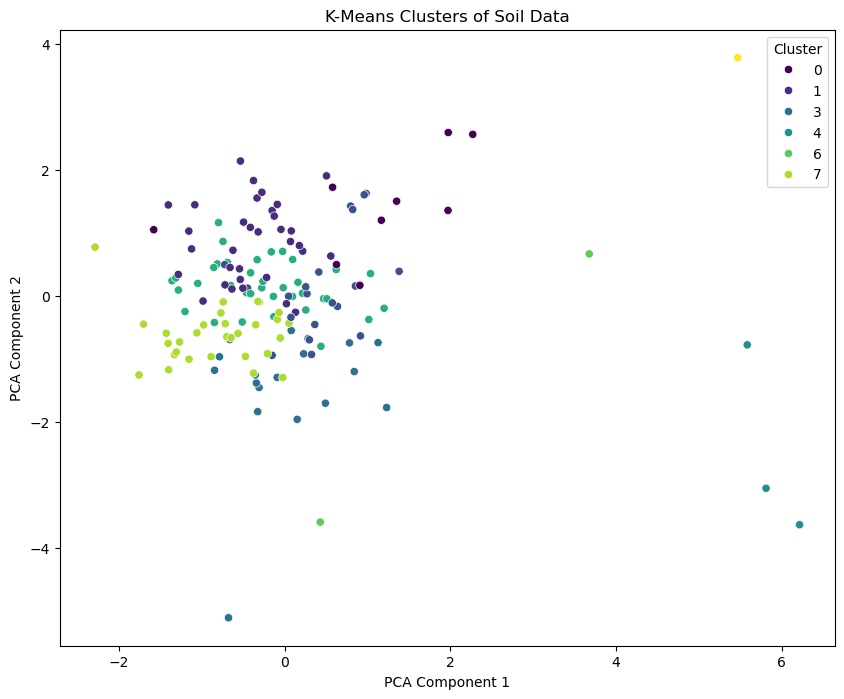

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clusters of Soil Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig('KmeansOutput.png', format='png', dpi=300, bbox_inches='tight')
plt.legend(title="Cluster")
plt.show()

In [50]:
df['Cluster']

0      8
1      4
2      0
3      5
4      0
      ..
147    2
148    7
149    4
150    3
151    6
Name: Cluster, Length: 152, dtype: int32